In [1]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [2]:
X = np.array([
    [1, 1, 0, 0, 1, 1],
    [1, 1, 1, 0, 0, 1],
    [1, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 1, 1],
])

In [3]:
def sokal(x1, x2):
    if len(x1) != len(x2):
        raise Exception("Vectors must be of equal length")
    ad = 0
    m = len(x1)
    for i in range(0, m):
        if x1[i] == x2[i]:
            ad += 1
    return ad / m

In [4]:
def jaccard(x1, x2):
    if len(x1) != len(x2):
        raise Exception("Vectors must be of equal length")
    bc = 0
    a = 0
    m = len(x1)
    for i in range(0, m):
        if x1[i] != x2[i]:
            bc += 1
        if x1[i] == 1 & x1[i] == x2[i] & x2[i]==1:
            a += 1
    return a / (a + bc)

In [5]:
def simil_matrix(X, simil="sokal"):
    s = sokal if simil == "sokal" else jaccard
    n = X.shape[0]
    S = np.zeros((n,n))
    for i in range(0, n):
        for j in range (0, n):
            S[i][j] = s(X[i], X[j])
    return S

In [6]:
S_sokal = simil_matrix(X)
S_sokal

array([[1.        , 0.66666667, 0.5       , 0.5       , 0.66666667],
       [0.66666667, 1.        , 0.5       , 0.5       , 0.33333333],
       [0.5       , 0.5       , 1.        , 1.        , 0.83333333],
       [0.5       , 0.5       , 1.        , 1.        , 0.83333333],
       [0.66666667, 0.33333333, 0.83333333, 0.83333333, 1.        ]])

In [7]:
S_jaccard = simil_matrix(X, 'jaccard')
S_jaccard

array([[1.        , 0.6       , 0.4       , 0.4       , 0.6       ],
       [0.6       , 1.        , 0.4       , 0.4       , 0.33333333],
       [0.4       , 0.4       , 1.        , 1.        , 0.75      ],
       [0.4       , 0.4       , 1.        , 1.        , 0.75      ],
       [0.6       , 0.33333333, 0.75      , 0.75      , 1.        ]])

In [8]:
def distance_matrix(S):
    D2 = 2 * np.ones((S.shape[0], S.shape[0]))
    D2 = D2 - 2 * S
    return D2

In [9]:
D2 = distance_matrix(S_sokal)
D2

array([[0.        , 0.66666667, 1.        , 1.        , 0.66666667],
       [0.66666667, 0.        , 1.        , 1.        , 1.33333333],
       [1.        , 1.        , 0.        , 0.        , 0.33333333],
       [1.        , 1.        , 0.        , 0.        , 0.33333333],
       [0.66666667, 1.33333333, 0.33333333, 0.33333333, 0.        ]])

In [10]:
distance_matrix(S_jaccard)

array([[0.        , 0.8       , 1.2       , 1.2       , 0.8       ],
       [0.8       , 0.        , 1.2       , 1.2       , 1.33333333],
       [1.2       , 1.2       , 0.        , 0.        , 0.5       ],
       [1.2       , 1.2       , 0.        , 0.        , 0.5       ],
       [0.8       , 1.33333333, 0.5       , 0.5       , 0.        ]])

In [11]:
D2_stand = StandardScaler().fit_transform(D2)
covariance = np.cov(D2_stand)
eig_values, eig_vectors  =la.eig(covariance)
eig_values.round(2)

array([ 4.48,  1.3 ,  0.03,  0.  , -0.  ])

In [12]:
eig_vectors.round(2)

array([[-0.5 , -0.58, -0.47, -0.44, -0.05],
       [-0.59,  0.57,  0.36, -0.44, -0.05],
       [ 0.39,  0.24, -0.29, -0.35,  0.65],
       [ 0.39,  0.24, -0.29, -0.53, -0.76],
       [ 0.3 , -0.48,  0.69, -0.44, -0.05]])

In [13]:
eig_values[0]/eig_values.sum(), eig_values[1]/eig_values.sum(), eig_values[2]/eig_values.sum()

(0.7717457629062912, 0.223593598105929, 0.0046606389877797555)

In [14]:
eig_values[0]/eig_values.sum() + eig_values[1]/eig_values.sum()

0.9953393610122201

In [15]:
new_df = []
for index, row in enumerate(D2_stand):
    new_df.append([np.dot(eig_vectors[:,0], row), np.dot(eig_vectors[:,1], row),])
new_df = pd.DataFrame(np.array(new_df), columns="Z1 Z2".split())
new_df.tail()

,Z1,Z2
0,2.104403,1.318451
1,2.509368,-1.273840
2,-1.663734,-0.566450
3,-1.663734,-0.566450
4,-1.286304,1.088288


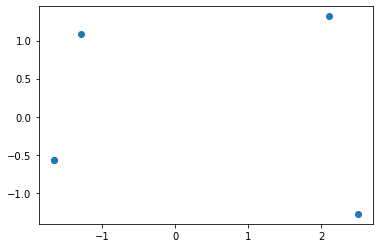

In [16]:
plt.plot(new_df.Z1, new_df.Z2, 'o')
plt.show()

## Regularización

In [17]:
X = pd.read_csv('./../datos/Datos_X.csv', header = None)
Y = pd.read_csv('./../datos/Datos_Y.csv', header = None)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.715617,0.420356,-1.128431,0.096898,-0.281453,0.998715,1.127674,-0.097352,0.593662,-0.547923,...,0.144221,0.284631,1.566366,-1.225861,0.287622,-0.821364,-0.053162,1.044272,0.908716,-0.004769
1,-1.628208,-1.510449,0.527613,-0.845558,-0.618104,1.354870,-0.859435,-0.407390,-0.694202,0.742492,...,-1.279415,0.836232,0.930348,-0.833588,-0.631738,0.176832,0.241163,0.447367,-0.417498,-0.400634
2,-0.332262,-1.476780,2.527841,0.745008,0.277968,0.648457,-0.110013,-0.233305,1.432093,-0.707001,...,0.625368,0.125197,-0.070570,-0.345752,-1.371680,1.712256,0.521146,0.633301,-0.655274,-0.632881
3,1.365216,0.925202,-0.148038,0.512592,0.117943,0.830771,1.655276,0.475056,1.638397,1.698356,...,1.188035,0.983117,-1.465421,-0.073310,1.925396,-0.610161,0.753453,-0.726542,1.111777,1.520648
4,0.034371,-1.272456,-1.303074,-0.035136,-0.356276,0.264360,-0.995227,0.702526,0.623539,-0.120871,...,0.255573,0.712102,1.267708,0.871283,0.573161,-0.747545,-0.621450,1.438620,0.247732,-1.504739


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.5)

## Calcular coeficientes de la regresión lineal simple

In [19]:
lm = LinearRegression()
lm_fit = lm.fit(X_train, Y_train)

### Calcular el error de esta regresión

In [20]:
def SSE(residuo):
    return np.sum(residuo*residuo) 

In [21]:
residuo_train = lm_fit.predict(X_train) - Y_train

In [22]:
SSE(residuo_train)

0    1.277084e-24
dtype: float64

 Este error es esencialmente cero. Esto puede ser porque hay más variables que puntos. El caso es que este modelo no se debe usar para hacer predicciones porque el error de testeo debe ser mayor que cero

In [23]:
residuo_test = lm_fit.predict(X_test) - Y_test
SSE(residuo_test)

0    253232.634016
dtype: float64

#### Esta es la evidencia de que hay un sobreajuste en el modelo!

Se puede también mirar el $R^2$ de los dos ajustes:

In [24]:
lm_fit.score(X_train, Y_train)

1.0

In [25]:
lm_fit.score(X_test, Y_test)

0.6841738189694071

Vamos a aplicar regularización con el método de Ridge:

$$
L_{regression} + \alpha ||\beta||_2 ^2
$$

In [26]:
lm_ridge = Ridge(0.5)
lm_ridge_fit = lm_ridge.fit(X_train, Y_train)

In [27]:
residuo_ridge_train = Y_train - lm_ridge_fit.predict(X_train)
SSE(residuo_ridge_train)

0    279.509648
dtype: float64

El error de entrenamiento no dio cero

In [28]:
residuo_ridge_test = Y_test - lm_ridge_fit.predict(X_test)
SSE(residuo_ridge_test)

0    250600.654702
dtype: float64

Muy alto todavía

### Regularización Lasso

In [29]:
lm_lasso = Lasso(0.5)
lm_lasso_fit = lm_lasso.fit(X_train, Y_train)

In [30]:
residuo_lasso_train = Y_train.T - lm_lasso_fit.predict(X_train)
SSE(np.array(residuo_lasso_train).T)

102.9385062822598

In [31]:
residuo_lasso_test = Y_test.T - lm_lasso_fit.predict(X_test)
SSE(np.array(residuo_lasso_test).T)

1127.164689839113